# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [76]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [77]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [78]:
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


In [79]:
hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

****
## Preliminary Analysis

In [80]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.columns

C:\SAnaconda\NewfolderForAnaconda\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

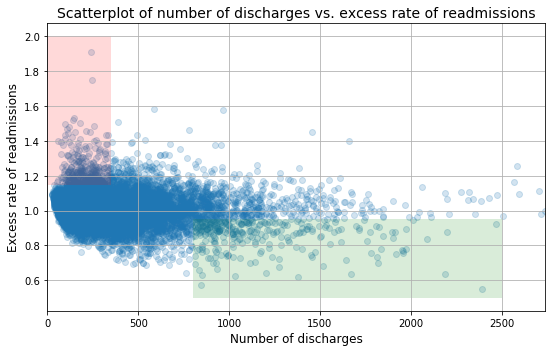

In [81]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

#### Part A of the above conclusion states that as the number of admissions increases meaning as the size of the hospital increases, the rate of readmission decreases.
#### We can check this claim by examing the pearson correlation coefficient between the number of admissions and the readmission ratio.

In [82]:
import scipy.stats as stats
corr, pvalue = stats.pearsonr(x,y)
print('The pearson correlation coefficient is '+ format(corr))

The pearson correlation coefficient is -0.09309554287590441


#### The pearson correlation coefficent of -0.09 show thats there is weak negative correlation between the number of admissions and the excess rate of readmission

#### Correlation between Number of discharges and Excess readmission ratio can be shown as below

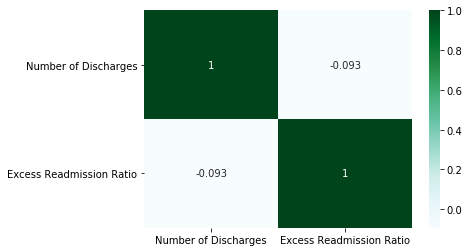

In [83]:
import seaborn as sns
df_2columns = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']][81:-3]
sns.heatmap(df_2columns.corr(), cmap='BuGn', annot=True)

In [84]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [85]:
clean_hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [86]:
clean_hospital_read_df_greater_than_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
mean1000 = clean_hospital_read_df_greater_than_1000['Excess Readmission Ratio'].mean()
pert_excess_readm_rate_1000 = len(clean_hospital_read_df_greater_than_1000[clean_hospital_read_df_greater_than_1000['Excess Readmission Ratio']>1]) / clean_hospital_read_df_greater_than_1000['Excess Readmission Ratio'].count()

clean_hospital_read_df_less_than_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
mean100 = clean_hospital_read_df_less_than_100['Excess Readmission Ratio'].mean()
pert_excess_readm_rate_100 = len(clean_hospital_read_df_less_than_100[clean_hospital_read_df_less_than_100['Excess Readmission Ratio']>1]) / clean_hospital_read_df_less_than_100['Excess Readmission Ratio'].count()

print(" In hospitals/facilities with number of discharges < 100, mean excess readmission rate is {} and {:0.2f}% have excess readmission rate greater than 1".format(mean100, pert_excess_readm_rate_100*100))

print(" In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is {} and {:0.2f}% have excess readmission rate greater than 1".format(mean1000, pert_excess_readm_rate_1000*100))

 In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.0226183501683506 and 63.22% have excess readmission rate greater than 1
 In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.9783354211663071 and 44.49% have excess readmission rate greater than 1


#### Part B of the preliminary analysis is correct

#### The definition of small and bigger hospital is not clear. There are two references for small hospital as number of discharges less than 300 and less than 100. Same with bigger hospitals, two references for bigger hospitals with number of discharges as greater than 800 and greater than 1000. 
#### We are using the definition of small and big hospital as the number of dischages less than 100 and greater than 1000 respectively.


#### Setting up the null and alternate hypothesis

#### Ho = There is no difference in mean Excess readmission rate between small and bigger hospitals
#### Ha = There is difference in mean excess readmission tate between small and bigger hospitals
#### alpha = 0.01



In [87]:
var100 = clean_hospital_read_df_less_than_100['Excess Readmission Ratio'].var()
var1000 = clean_hospital_read_df_greater_than_1000['Excess Readmission Ratio'].var()
n1 = clean_hospital_read_df_less_than_100['Excess Readmission Ratio'].count()
n2 = clean_hospital_read_df_greater_than_1000['Excess Readmission Ratio'].count()

zscore = (mean100 - mean1000)/np.sqrt((var100/n1) + (var1000/n2))
print("Z-score: ",round(zscore,2))

p_value = (1-stats.norm.cdf(zscore))*2
print("p value: "+format(p_value))

Z-score:  7.6
p value: 2.930988785010413e-14


#### With p_value being less than the set alpha = 0.01, we can reject the null hypothesis that there is no difference in mean excess readmission rate between small and bigger hospitals

#### We can represent the given data in a joint plot where the individual variables' distribution is shown along with the scatter plot of the variables.

C:\SAnaconda\NewfolderForAnaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


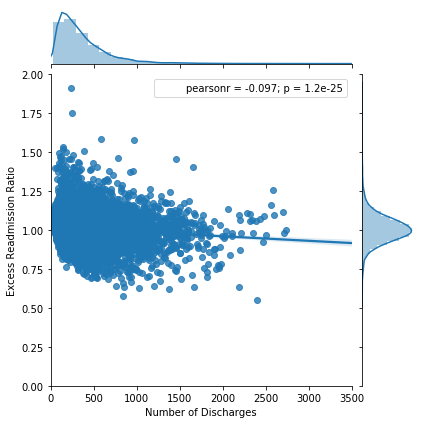

In [75]:
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=clean_hospital_read_df, kind='reg',  
              xlim=(0,3500), ylim=(0,2.0))
#plt.xlim(0,3000)
#plt.ylim(0,2.0)
plt.show()